## Importing Necessary Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path , delimiter=',') 
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:] 
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY) 
        path_XYs.append(XYs)
    return path_XYs

In [16]:
colours = ['black']
def plot(path_XYs,save_path):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(path_XYs): 
        c = colours[i % len(colours)] 
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2) 
    ax.set_aspect('equal')
    ax.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()

## Input Path

In [12]:
path_inp = "problems/isolated.csv" # give path to input csv here
path_XYs = read_csv(path_inp)

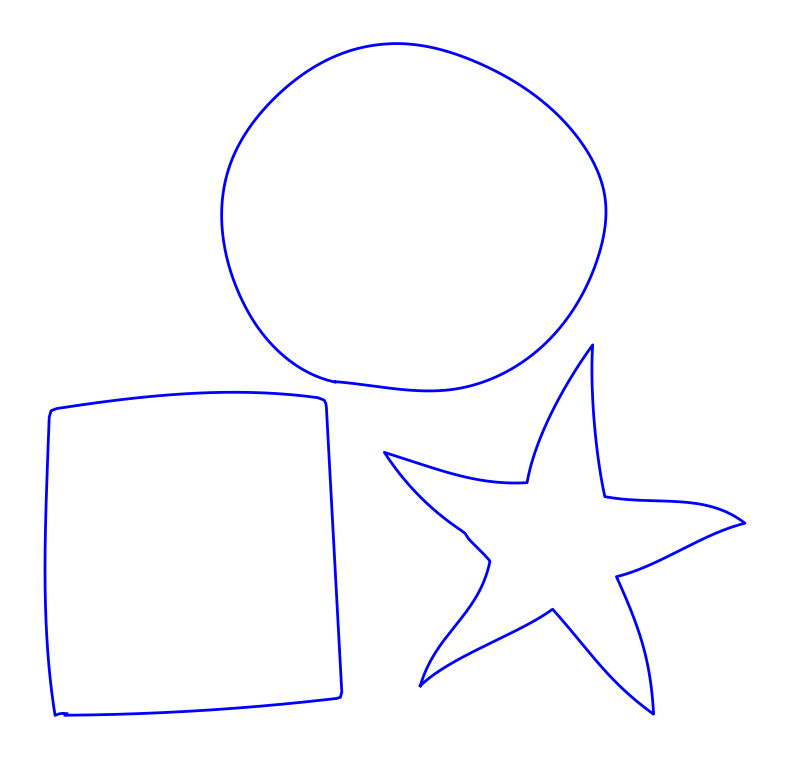

In [13]:
plot(path_XYs,"image.png")

In [20]:
class ShapeDetector:
    def __init__(self):
        pass
    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        # if the shape is a triangle, it will have 3 vertices
        if len(approx) == 3:
            shape = "triangle"
        # if the shape has 4 vertices, it is either a square or
        # a rectangle
        elif len(approx) == 4:
            # compute the bounding box of the contour and use the
            # bounding box to compute the aspect ratio
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            # a square will have an aspect ratio that is approximately
            # equal to one, otherwise, the shape is a rectangle
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        # if the shape is a pentagon, it will have 5 vertices
        elif len(approx) == 5:
            shape = "pentagon"
            # otherwise, we assume the shape is a circle
        else:
            shape = "circle"
        # return the name of the shape
        return shape

## Regularization

In [21]:
img = cv2.imread("image.png")

# converting image to gray scale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# adding the threshold value

_,threshold = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

# using a findContour function

contours,_ = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
sd = ShapeDetector()

shape=set()
i=0
divMinSize=0.125
divMaxSize=0.175
# list for shorting names of all the shapes
color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))

for contour in contours:
    if i==0:
        i=1
        continue
        
    sh = sd.detect(contour)
    
    if sh!="unidentified":
        shape.add(sh)
    
print("Regular Shapes detected:", shape)

Regular Shapes detected: {'circle', 'rectangle'}
